In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("C:/Users/LENOVO/OneDrive/Dokumen/andat/TLKM.JK.xlsx")
data = data.set_index('Date')

<AxesSubplot:xlabel='Date'>

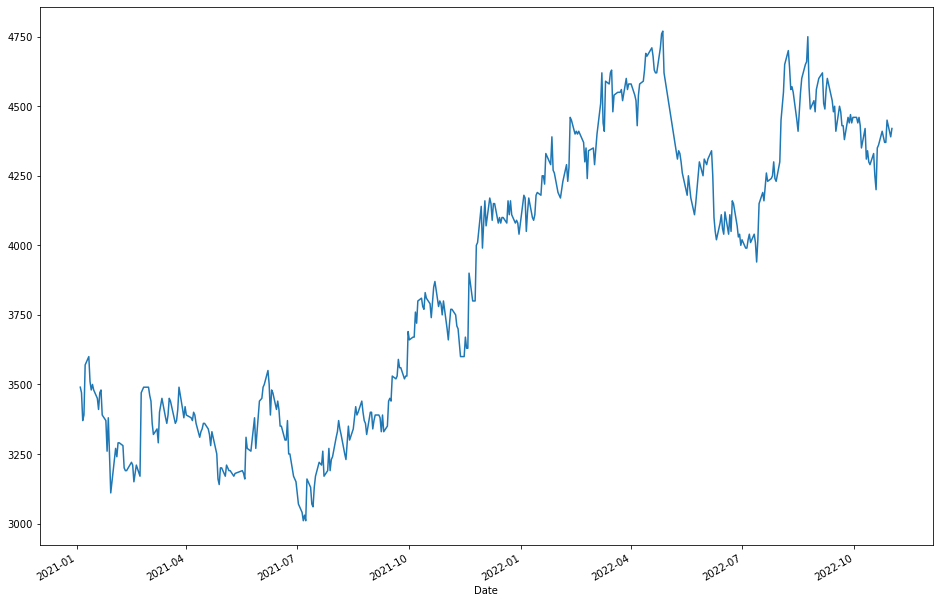

In [3]:
data['Close'].plot(figsize=(16,11))

In [4]:
#Interpolasi merupakan teknik untuk mencari nilai suatu variabel yang hilang pada rentang data yang diketahui
#digunakan interpolasi linear -> f(x) = y1 + (x – x1) ((y2 – y1)/(x2 – x1))
# data = data.interpolate()

In [5]:
data=pd.DataFrame(data['Close'])
data

,Close
Date,
2021-01-04,3490
2021-01-05,3470
2021-01-06,3370
2021-01-07,3390
2021-01-08,3570
...,...
2022-10-26,4370
2022-10-27,4370
2022-10-28,4450


# Predict the next time step using a sequence of past observations

In [6]:
# yt-n,...,yt-1,yt=yt+1
def window_input(window_length: int, data: pd.DataFrame) -> pd.DataFrame:
    
    data = data.copy()
    
    i = 1
    while i < window_length:
        data[f'x_{i}'] = data['Close'].shift(-i)
        i = i + 1
        
    if i == window_length:
        data['y'] = data['Close'].shift(-i)
        
    # Drop rows where there is a NaN
    data = data.dropna(axis=0)
        
    return data

In [7]:
new_data = window_input(5, data)

In [8]:
new_data

,Close,x_1,x_2,x_3,x_4,y
Date,,,,,,
2021-01-04,3490,3470.0,3370.0,3390.0,3570.0,3600.0
2021-01-05,3470,3370.0,3390.0,3570.0,3600.0,3510.0
2021-01-06,3370,3390.0,3570.0,3600.0,3510.0,3480.0
2021-01-07,3390,3570.0,3600.0,3510.0,3480.0,3500.0
2021-01-08,3570,3600.0,3510.0,3480.0,3500.0,3480.0
...,...,...,...,...,...,...
2022-10-19,4200,4350.0,4360.0,4410.0,4390.0,4370.0
2022-10-20,4350,4360.0,4410.0,4390.0,4370.0,4370.0
2022-10-21,4360,4410.0,4390.0,4370.0,4370.0,4450.0


In [9]:
X=new_data.iloc[:,0:5].values
y=new_data.iloc[:,5].values

print("Shape of X",X.shape)
print("Shape of y",y.shape)

Shape of X (445, 5)
Shape of y (445,)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [11]:
#decision tree regressor
from sklearn.tree import DecisionTreeRegressor
dt_reg_5 = DecisionTreeRegressor(random_state=42)

dt_reg_5.fit(X_train, y_train)

dt_reg_5_pred = dt_reg_5.predict(X_test)

In [12]:
dt_reg_5_pred

array([4120., 4120., 3990., 4110., 3990., 3990., 3990., 3990., 3990.,
       4110., 3990., 4000., 3990., 3990., 4180., 4150., 4300., 4220.,
       4290., 4330., 4210., 4290., 4330., 4340., 4310., 4510., 4440.,
       4440., 4560., 4680., 4550., 4550., 4710., 4580., 4540., 4590.,
       4580., 4590., 4630., 4710., 4680., 4540., 4310., 4710., 4550.,
       4580., 4560., 4620., 4480., 4430., 4550., 4550., 4550., 4620.,
       4430., 4550., 4580., 4410., 4620., 4560., 4410., 4410., 4300.,
       4370., 4370., 4410., 4410., 4410., 4410., 4410., 4410., 4410.,
       4300., 4400., 4300., 4240., 4350., 4260., 4290., 4260., 4190.,
       4290., 4300., 4400., 4340., 4350., 4350., 4400., 4350.])

In [13]:
#gradient boosting
from sklearn.ensemble import GradientBoostingRegressor
gbr_5 = GradientBoostingRegressor(random_state=42)

gbr_5.fit(X_train, y_train)

gbr_5_pred = gbr_5.predict(X_test)

In [14]:
gbr_5_pred

array([4105.8494132 , 4091.11531351, 4094.36573824, 4087.7744697 ,
       4083.10872777, 4094.35543405, 4087.7744697 , 4098.29939912,
       4098.29939912, 4083.10872777, 4083.10872777, 3956.41872644,
       4078.81415524, 4094.97215198, 4174.08340999, 4120.70905243,
       4250.41196953, 4245.14266728, 4270.02180928, 4269.40117447,
       4243.89342469, 4318.09151667, 4274.61020083, 4258.60189077,
       4297.06354892, 4415.95578116, 4558.78520705, 4523.83960178,
       4477.97082705, 4676.77403211, 4655.58589275, 4563.99167182,
       4570.92829912, 4563.96113031, 4448.74491245, 4466.76208152,
       4543.84442374, 4569.29017782, 4620.53974947, 4617.41004133,
       4715.21546654, 4519.23136945, 4511.73304273, 4545.19591946,
       4540.61870721, 4554.48163331, 4580.77715809, 4591.19881836,
       4587.4521802 , 4551.9491348 , 4559.12974695, 4543.84442374,
       4588.69719492, 4563.46149415, 4542.14952626, 4546.65027129,
       4554.48163331, 4456.12487195, 4543.84442374, 4534.16537

In [15]:
#Neural network module
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout,BatchNormalization,LSTM

In [16]:
model=Sequential()
model.add(LSTM(64,activation="relu",input_shape=(1,5)))
model.add(Dense(1))
model.compile(loss='mean_absolute_percentage_error', optimizer='adam')

In [17]:
nn_X_train = np.reshape(X_train, (len(X_train), 1,5))
nn_y_train = np.reshape(y_train, (len(y_train), 1))
nn_X_test = np.reshape(X_test, (len(X_test), 1, 5))
nn_y_test = np.reshape(y_test, (len(y_test), 1))

In [18]:
history=model.fit(nn_X_train,nn_y_train,validation_data=(nn_X_test,nn_y_test),batch_size=30,epochs=20,verbose=1)
history

Epoch 1/20
12/12 [==============================] - 2s 31ms/step - loss: 67.3296 - val_loss: 60.0773
Epoch 2/20
12/12 [==============================] - 0s 5ms/step - loss: 54.8690 - val_loss: 48.8699
Epoch 3/20
12/12 [==============================] - 0s 6ms/step - loss: 41.2574 - val_loss: 29.6390
Epoch 4/20
12/12 [==============================] - 0s 17ms/step - loss: 22.5811 - val_loss: 13.8685
Epoch 5/20
12/12 [==============================] - 0s 7ms/step - loss: 6.6108 - val_loss: 3.0794
Epoch 6/20
12/12 [==============================] - 0s 6ms/step - loss: 3.5718 - val_loss: 1.5333
Epoch 7/20
12/12 [==============================] - 0s 5ms/step - loss: 1.9270 - val_loss: 1.5216
Epoch 8/20
12/12 [==============================] - 0s 6ms/step - loss: 1.7309 - val_loss: 1.4807
Epoch 9/20
12/12 [==============================] - 0s 6ms/step - loss: 1.6706 - val_loss: 1.4739
Epoch 10/20
12/12 [==============================] - 0s 9ms/step - loss: 1.6476 - val_loss: 1.5076
Epoch 11/

In [19]:
nn_5_pred = model.predict(nn_X_test)

In [20]:
#mean absolute percentage error (MAPE)
def mape(y_true, y_pred):
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)

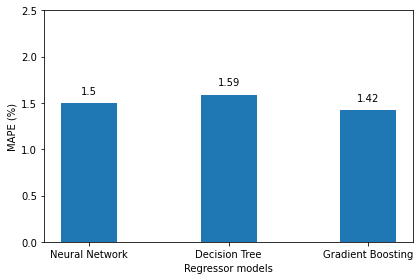

In [21]:
dt_5_mape = mape(y_test, dt_reg_5_pred)
gbr_5_mape = mape(y_test, gbr_5_pred)
nn_5_mape = mape(nn_y_test, nn_5_pred)
# Generate the bar plot
fig, ax = plt.subplots()

x = ['Neural Network','Decision Tree', 'Gradient Boosting']
y = [nn_5_mape, dt_5_mape, gbr_5_mape]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Regressor models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 2.5)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 0.1, s=str(value), ha='center')
    
plt.tight_layout()

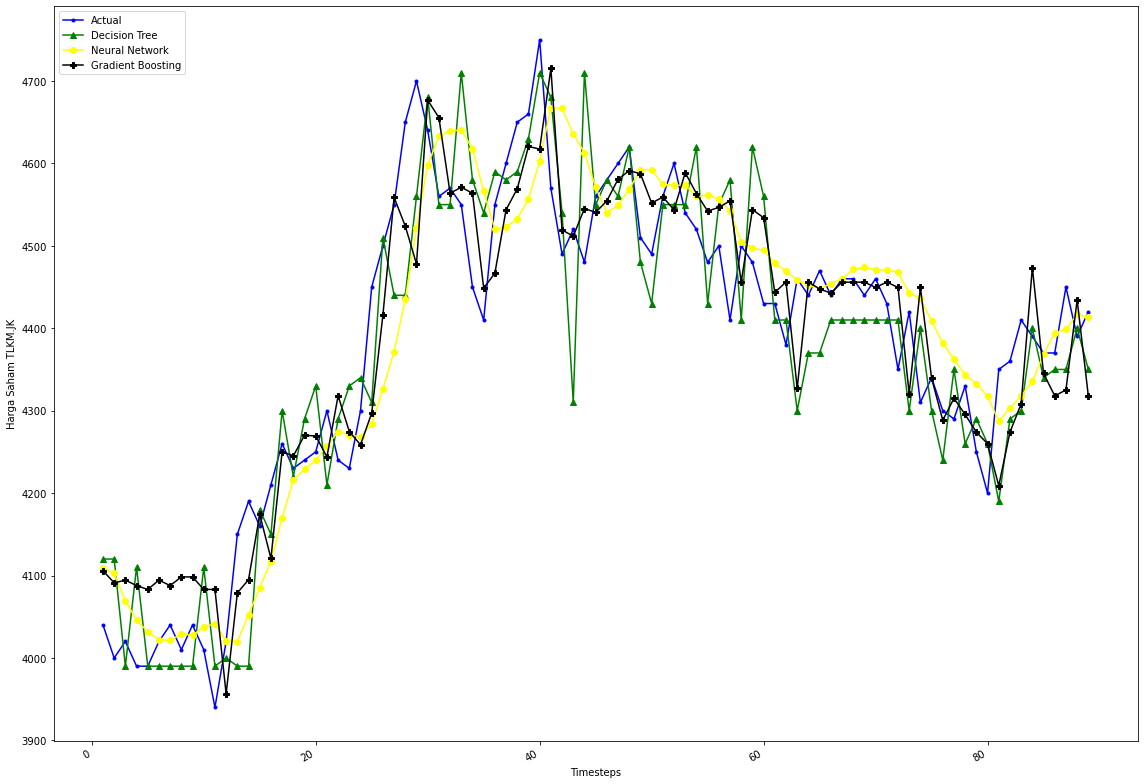

In [27]:
fig, ax = plt.subplots(figsize=(16, 11))
# ax.plot(np.arange(0, 89, 1), X_test[:89,1], 'b-', label='input')
ax.plot(np.arange(1, 90, 1), y_test, marker='.', color='blue', label='Actual')
ax.plot(np.arange(1, 90, 1), dt_reg_5_pred, marker='^', color='green', label='Decision Tree')
ax.plot(np.arange(1, 90, 1), nn_5_pred, marker='o', color='yellow', label='Neural Network')
ax.plot(np.arange(1, 90, 1), gbr_5_pred, marker='P', color='black', label='Gradient Boosting')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Harga Saham TLKM.JK')
# plt.xticks(np.arange(1, 104, 52), np.arange(2000, 2002, 1))
plt.legend(loc=2)
fig.autofmt_xdate()
plt.tight_layout()